# FCR-D Analysis of Price and volumes

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns



## Load csv
If you haven't loaded this before run the API. It will take a little bit to run depending on your computer. (Took me 2 min)
Otherwise if already run before save it in a CSV file and load that file instead.

In [2]:
df = pd.read_csv('1s_Resolution_2023_freq_data.csv',header=None,names=['Res','Min','Max','AVG','Std','Min/Max diff'] ) # Change path
# Takes 8 s to load. It is big..

In [3]:
print(df.head())
print(df.columns)

    Res       Min       Max        AVG       Std  Min/Max diff
0  10.0  49.96991  49.97239  49.970662  0.000700       0.00248
1  20.0  49.97066  49.97546  49.973259  0.001703       0.00480
2  30.0  49.97433  49.97779  49.975512  0.000991       0.00346
3  40.0  49.97599  49.97967  49.978401  0.001184       0.00368
4  50.0  49.97768  49.98204  49.980470  0.001123       0.00436
Index(['Res', 'Min', 'Max', 'AVG', 'Std', 'Min/Max diff'], dtype='object')


Frequency distribution:

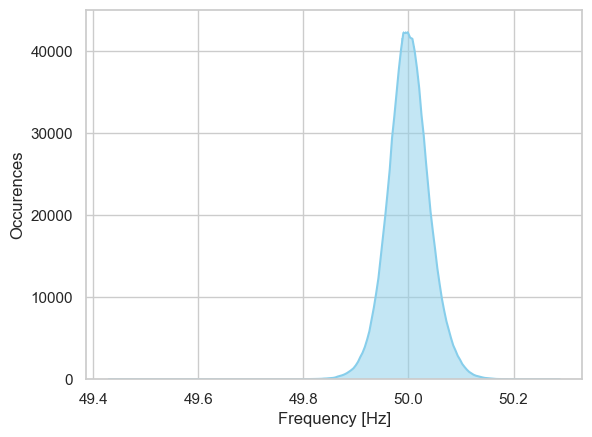

In [4]:
# Sample data
data = df["AVG"]

# Set up seaborn style
sns.set(style="whitegrid")

# Create histogram
sns.histplot(data, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Frequency [Hz]')
plt.ylabel('Occurences')

# Show the plot
plt.show()


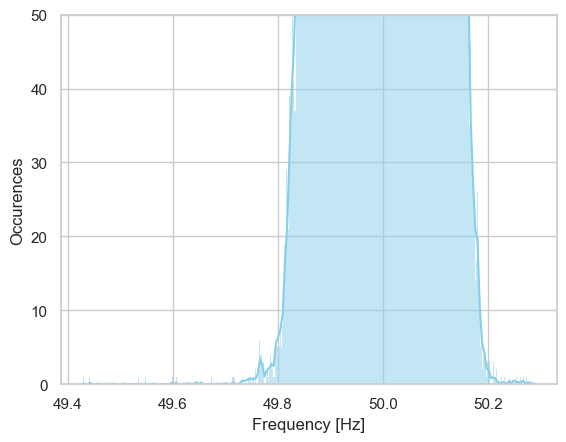

In [21]:
# Sample data
data = df["AVG"]

# Set up seaborn style
sns.set(style="whitegrid")

# Create histogram
sns.histplot(data, kde=True, color='skyblue')
plt.ylim(0,50)
# Add labels and title
plt.xlabel('Frequency [Hz]')
plt.ylabel('Occurences')

# Show the plot
plt.show()


How often is FCR-D activated?

In [8]:
up_act = df["AVG"] <= 49.9
dn_act = df["AVG"] >= 50.1


In [19]:
h_per_year = (sum(up_act * 1) + sum(dn_act * 1))/(60*60)
print(h_per_year)
hour_in_1_year = len(up_act)/(60*60)
print((h_per_year/hour_in_1_year)*100)


39.09361111111111
1.8110564819999102


How to represent the frequency to activation?

In [36]:
df2 = pd.read_csv('2023-01-13.csv')
df2["Time"] = pd.to_datetime(df2["Time"]) # Convert HourDK to datetimeprint(df), such that one can use it to index


In [37]:
print(df2.head())

                     Time     Value
0 2023-01-13 00:00:00.000  50.00427
1 2023-01-13 00:00:00.100  50.00468
2 2023-01-13 00:00:00.200  50.00494
3 2023-01-13 00:00:00.300  50.00478
4 2023-01-13 00:00:00.400  50.00483


Plot the frequency:

In [40]:

mask = (df2["Time"] >= Latest_time)
print(mask)

2023-01-13 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
0         True
1         True
2         True
3         True
4         True
          ... 
862563    True
862564    True
862565    True
862566    True
862567    True
Name: Time, Length: 862568, dtype: bool


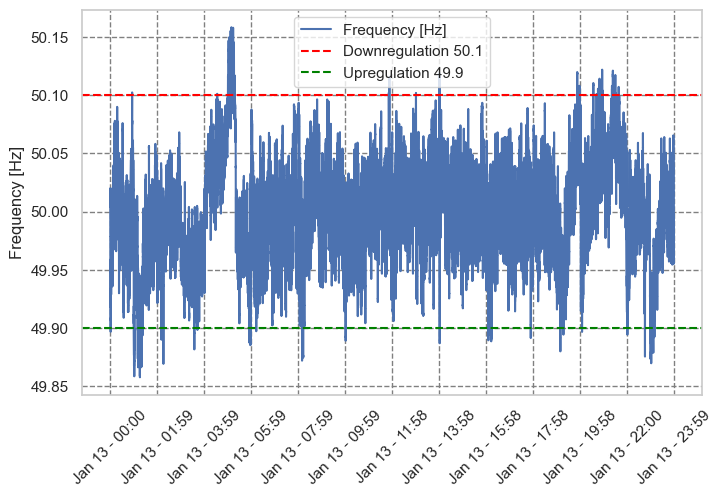

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
Latest_time = pd.to_datetime('2023-01-13 00:00:00.000')
Earliest_time = pd.to_datetime('2023-01-14 00:00:00.000')
mask = (df2["Time"] >= Latest_time) & (df2["Time"] <= Earliest_time)
freq = df2["Value"].loc[mask].reset_index(drop=True)
plt.plot(freq, label="Frequency [Hz]", drawstyle='steps-post')

xaxis = df2["Time"].loc[mask].reset_index(drop=True)

# Set the x-axis ticks to be monthly
num_ticks = len(xaxis)
tick_step = max(1, int(np.ceil(num_ticks / 12))) # Show at least one tick per month
month_ticks = xaxis.index % tick_step == 0
if not month_ticks[0]:
    month_ticks[0] = True
if not month_ticks[-1]:
    month_ticks[-1] = True
plt.xticks(xaxis.index[month_ticks], xaxis[month_ticks].dt.strftime("%b %d - %H:%M"), rotation=45)

plt.grid(linestyle='--', color='gray')

# Add horizontal lines at 50.1 and 49.9
plt.axhline(y=50.1, color='red', linestyle='--', label='Downregulation 50.1')
plt.axhline(y=49.9, color='green', linestyle='--', label='Upregulation 49.9')

# Show legend
plt.legend()

plt.ylabel("Frequency [Hz]")

plt.show()


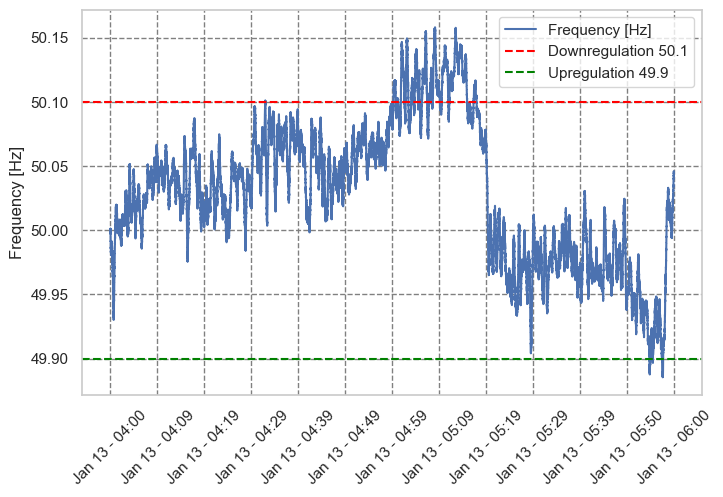

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
Latest_time = pd.to_datetime('2023-01-13 04:00:00.000')
Earliest_time = pd.to_datetime('2023-01-13 06:00:00.000')
mask = (df2["Time"] >= Latest_time) & (df2["Time"] <= Earliest_time)
freq = df2["Value"].loc[mask].reset_index(drop=True)
plt.plot(freq, label="Frequency [Hz]", drawstyle='steps-post')

xaxis = df2["Time"].loc[mask].reset_index(drop=True)

# Set the x-axis ticks to be monthly
num_ticks = len(xaxis)
tick_step = max(1, int(np.ceil(num_ticks / 12))) # Show at least one tick per month
month_ticks = xaxis.index % tick_step == 0
if not month_ticks[0]:
    month_ticks[0] = True
if not month_ticks[-1]:
    month_ticks[-1] = True
plt.xticks(xaxis.index[month_ticks], xaxis[month_ticks].dt.strftime("%b %d - %H:%M"), rotation=45)

plt.grid(linestyle='--', color='gray')

# Add horizontal lines at 50.1 and 49.9
plt.axhline(y=50.1, color='red', linestyle='--', label='Downregulation 50.1')
plt.axhline(y=49.9, color='green', linestyle='--', label='Upregulation 49.9')

# Show legend
plt.legend()

plt.ylabel("Frequency [Hz]")

plt.show()


Which is translated to frequency by:

In [54]:

Latest_time = pd.to_datetime('2023-01-13 04:00:00.000')
Earliest_time = pd.to_datetime('2023-01-13 06:00:00.000')
mask = (df2["Time"] >= Latest_time) & (df2["Time"] <= Earliest_time)
Freq = df2["Value"].loc[mask].reset_index(drop=True)

FCR_D_act_up = np.where((Freq <= 49.9) & (Freq > 49.5), (Freq-49.9)/-0.4, np.where(Freq <= 49.5,1,0))

#a = (-1-0)/(50.5-50.1) ; b = -1 - a*50.5
FCR_D_act_dn = np.where((Freq <= 50.5) & (Freq >= 50.1), (Freq-50.1)/0.4, np.where(Freq >= 50.5,1,0))

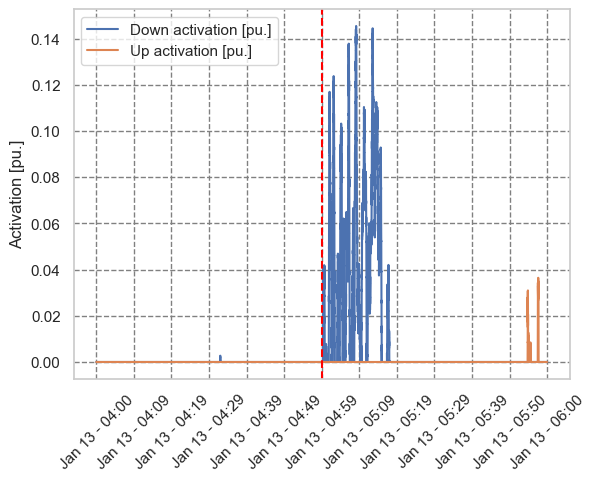

In [70]:
import matplotlib.pyplot as plt

plt.plot(FCR_D_act_dn, label="Down activation [pu.]", drawstyle='steps-post')
plt.plot(FCR_D_act_up, label="Up activation [pu.]", drawstyle='steps-post')

xaxis = df2["Time"].loc[mask].reset_index(drop=True)

# Set the x-axis ticks to be monthly
num_ticks = len(xaxis)
tick_step = max(1, int(np.ceil(num_ticks / 12)))  # Show at least one tick per month
month_ticks = xaxis.index % tick_step == 0
if not month_ticks[0]:
    month_ticks[0] = True
if not month_ticks[-1]:
    month_ticks[-1] = True
plt.xticks(xaxis.index[month_ticks], xaxis[month_ticks].dt.strftime("%b %d - %H:%M"), rotation=45)

plt.grid(linestyle='--', color='gray')

# Add vertical line at Jan 13 - 05:00

plt.axvline(x=len(xaxis)/2, color='red', linestyle='--')

# Show legend
plt.legend()

plt.ylabel("Activation [pu.]")

plt.show()


The hourly activation is then:

In [68]:
FCR_D_act_dn_h = [np.mean(FCR_D_act_dn[0:int(len(FCR_D_act_dn)/2)]), np.mean(FCR_D_act_dn[int(len(FCR_D_act_dn)/2):])]
FCR_D_act_up_h = [np.mean(FCR_D_act_up[0:int(len(FCR_D_act_up)/2)]), np.mean(FCR_D_act_up[int(len(FCR_D_act_up)/2):])]

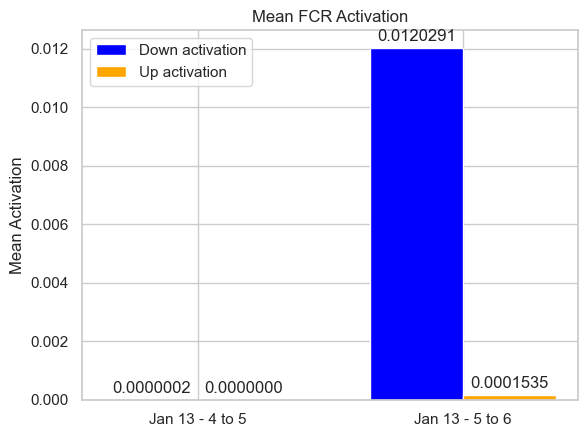

In [76]:
import numpy as np
import matplotlib.pyplot as plt

FCR_D_act_dn_h = [np.mean(FCR_D_act_dn[0:int(len(FCR_D_act_dn)/2)]), np.mean(FCR_D_act_dn[int(len(FCR_D_act_dn)/2):])]
FCR_D_act_up_h = [np.mean(FCR_D_act_up[0:int(len(FCR_D_act_up)/2)]), np.mean(FCR_D_act_up[int(len(FCR_D_act_up)/2):])]

labels = ['Jan 13 - 4 to 5', 'Jan 13 - 5 to 6']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, FCR_D_act_dn_h, width, label='Down activation', color='blue')
rects2 = ax.bar(x + width/2, FCR_D_act_up_h, width, label='Up activation', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Activation')
ax.set_title('Mean FCR Activation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add values on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.7f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


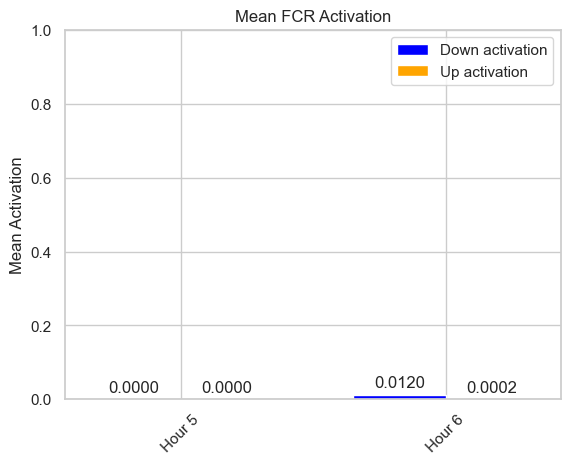

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Your data
FCR_D_act_dn_h = [np.mean(FCR_D_act_dn[0:int(len(FCR_D_act_dn)/2)]), np.mean(FCR_D_act_dn[int(len(FCR_D_act_dn)/2):])]
FCR_D_act_up_h = [np.mean(FCR_D_act_up[0:int(len(FCR_D_act_up)/2)]), np.mean(FCR_D_act_up[int(len(FCR_D_act_up)/2):])]

labels = ['Hour 5', 'Hour 6']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.set_ylim(0, 1)  # Set y-axis range from 0 to 1

rects1 = ax.bar(x - width/2, FCR_D_act_dn_h, width, label='Down activation', color='blue')
rects2 = ax.bar(x + width/2, FCR_D_act_up_h, width, label='Up activation', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Activation')
ax.set_title('Mean FCR Activation')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)  # Rotate x-axis labels by 45 degrees
ax.legend()

# Add values on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


In [102]:
# Scaling:
# https://datascience.stackexchange.com/questions/39932/feature-scaling-both-training-and-test-data
val=np.array([1,2,3,4,5,6,7,8])
print(min(val))
print(max(val))

val_scaled = (val-min(val))/(max(val)-min(val))
print(val)
print(val_scaled)

bid = 3
#y= a*x -> a = y/x

coef = bid/np.sum(val)
print(coef)

coef_scaled = bid/np.sum(val_scaled)
print(coef_scaled)

test_features =np.array([1,2,3,4,5,6,7,4,4])
test_features_scaled = (test_features-min(val))/(max(val)-min(val))
print(test_features_scaled)

print(coef_scaled*np.sum(test_features_scaled))
print(coef*np.sum(test_features))


1
8
[1 2 3 4 5 6 7 8]
[0.         0.14285714 0.28571429 0.42857143 0.57142857 0.71428571
 0.85714286 1.        ]
0.08333333333333333
0.75
[0.         0.14285714 0.28571429 0.42857143 0.57142857 0.71428571
 0.85714286 0.42857143 0.42857143]
2.8928571428571423
3.0
